앞서 데이터 전처리로 모은 데이터 셋을 한곳에 합쳐서 total_dataset.csv로 만들어준뒤, 학습을 시킵니다.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling1D
from keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling1D, Conv1D
from keras.models import Sequential, Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
seed = 3
numpy.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv('./total_dataset.csv', header = None)
dataset = df.values
X= dataset[:,0:76]
Y_obj = dataset[:,76]

e=LabelEncoder()
e.fit(Y_obj)
Y=e.transform(Y_obj)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=2) 
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=2)

In [4]:
model = Sequential()
model.add(Dense(48, input_shape=(76,), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 48)                3696      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 26        
Total params: 5,198
Trainable params: 5,198
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Train on 5973 samples, validate on 1991 samples
Epoch 1/100
5973/5973 [==============================] - 1s 132us/step - loss: 0.2523 - accuracy: 0.8865 - val_loss: 0.0627 - val_accuracy: 0.9782
Epoch 2/100
5973/5973 [==============================] - 0s 79us/step - loss: 0.0649 - accuracy: 0.9783 - val_loss: 0.0304 - val_accuracy: 0.9897
Epoch 3/100
5973/5973 [==============================] - 0s 76us/step - loss: 0.0450 - accuracy: 0.9879 - val_loss: 0.0438 - val_accuracy: 0.9824
Epoch 4/100
5973/5973 [==============================] - 0s 77us/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0257 - val_accuracy: 0.9917
Epoch 5/100
5973/5973 [==============================] - 0s 75us/step - loss: 0.0315 - accuracy: 0.9886 - val_loss: 0.0274 - val_accuracy: 0.9925
Epoch 6/100
5973/5973 [==============================] - 0s 75us/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0331 - val_accuracy: 0.9882
Epoch 7/100
5973/5973 [==============================] - 0s 75us/step - los

In [7]:
model.evaluate(X_test,Y_test)

1991/1991 [==============================] - 0s 51us/step


[0.020947533010845207, 0.9934706091880798]

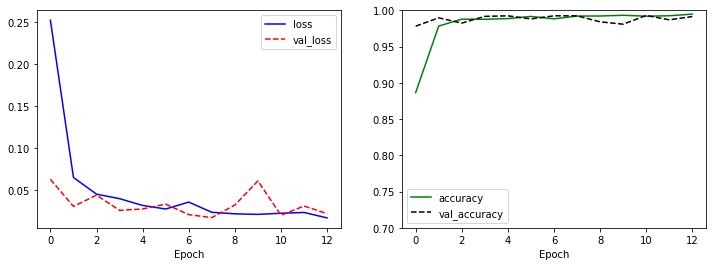

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()